## sklearn 라이브러리의 LinearRegression API 
* LinearRegression API의 Method (함수)
> * fit(X, y) : 학습 데이터를 이용하여 모델의 회귀 계수(w)와 편향(b)을 학습
> * predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측값 반환
> * score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능 지표(𝑅2) 반환

* LinearRegression API의 Attribute(속성)
> * coef_: fit() 메서드를 통해 학습된 모델의 회귀계수(W)
> * intercept_: Bias 값(b)

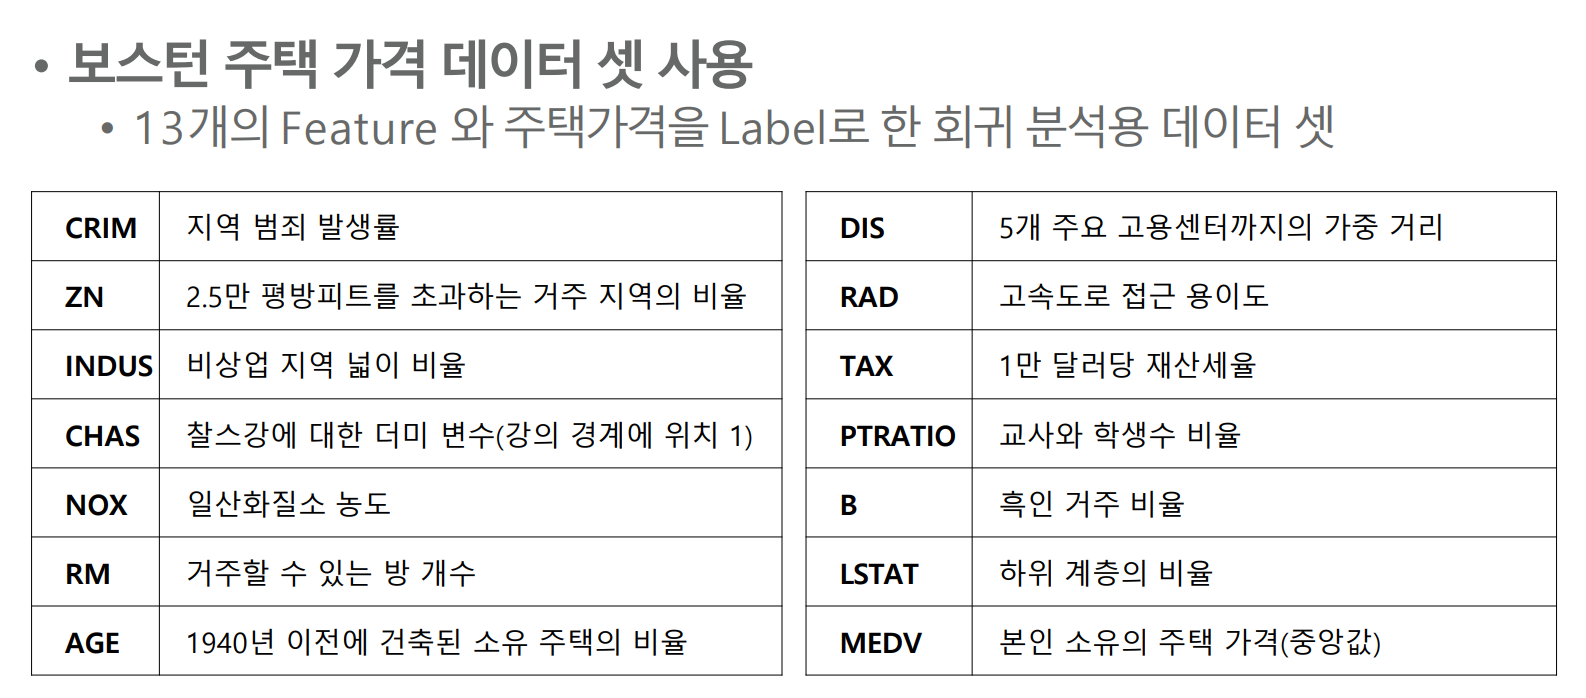

## 보스턴 주택 가격 예측 모델 구현

In [1]:
# 보스턴 주택 가격 데이터셋 load
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

df_boston['PRICE'] = boston.target

print('Boston Dataset Size:', df_boston.size) 
df_boston.head()

Boston Dataset Size: 7084


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# 훈련/ 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

x_train,x_test, y_train,y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

In [3]:
# LinearRegression API를 이용한 모델 생성 및 학습
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

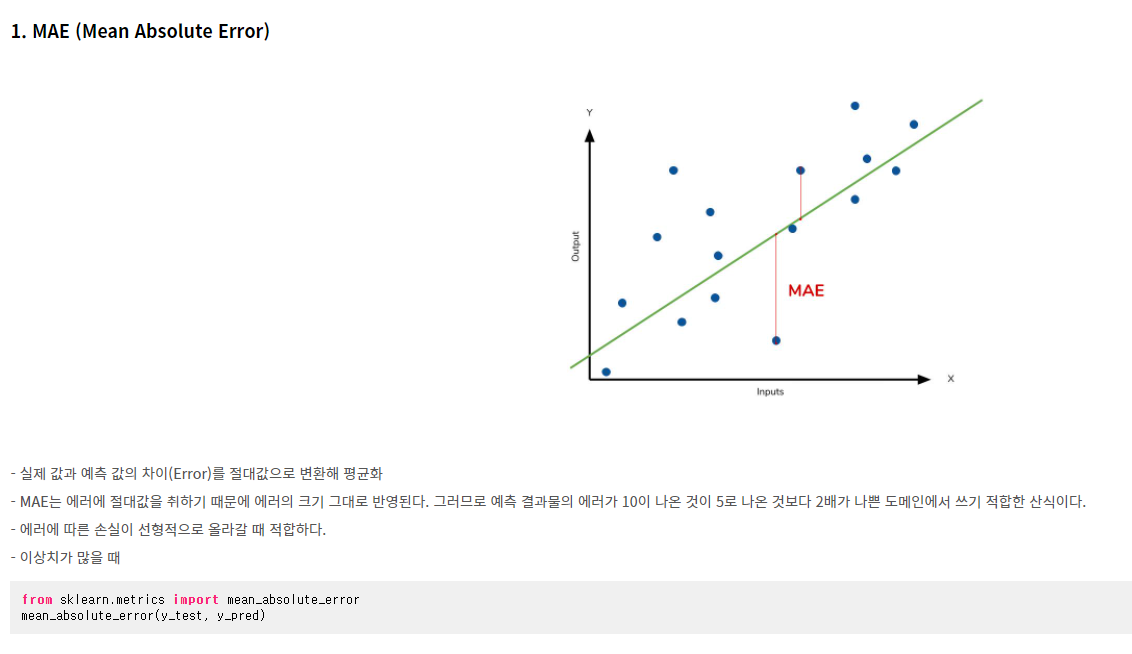

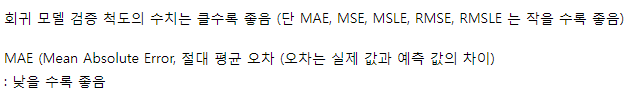

* 잔차값(예측값과 실제값 간의 차이)을 절대값 취하고 평균을 낸 방법
* 즉, MAE는 모델이 예측을 얼마나 틀렸는가를 의미한다.

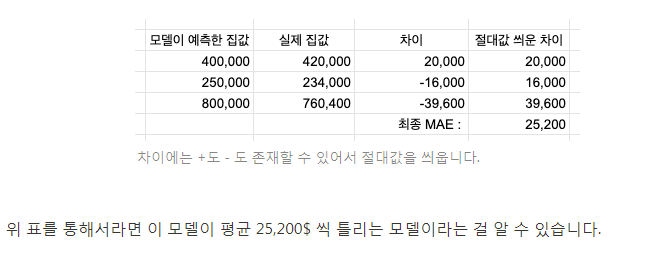

In [4]:
# 학습된 모델에 테스트 데이터(x_test) 입력하여 예측 값 생성
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(x_test)

In [5]:
# 예측 값(y_pred)과 테스트 데이터의 정답(y_test)을 이용하여 성능 측정
# 해당 모델은 평균 3.214씩 틀리는 모델이라는 걸 알 수 있음 
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {0:.3f}'.format(mae))

MAE: 3.214


In [6]:
# 학습된 모델의 성능 측정 및 회귀 계수 확인
import numpy as np

bias = np.round(lr.intercept_, 11) 
weight = np.round(lr.coef_, 1)

print('Bias:', bias) 
print('Weight:', weight)

Bias: 40.99559517216
Weight: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
# 학습된 모델의 회귀 계수 확인
# 회귀계수를 구하는 이유는 독립변수의 변화가 종속변수를 얼마나 변화시키는지 알기 위해서
# 회귀계수를 통해 설명 가능!
# RM 방의 개수가 1 늘어나면 집값이 3.4 늘어났다
coeff = pd.Series(data=weight, index=x_data.columns) 
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64